In [9]:
from pyproj import Proj, transform
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [10]:
os.chdir("C:/Users/z5239548/Documents/GovHack 2019")

In [11]:
from pyproj import Proj, Transformer

def transform_coord_list(xx,yy,proj_from=4326, proj_to=28355):
    # lon, lat in
    transformer = Transformer.from_crs(proj_from,proj_to)
    # transpose
    # transpose again
    return transformer.transform(xx=xx, yy=yy)

def scale(X, x_min, x_max):
    nom = (X-X.min(axis=0))*(x_max-x_min)
    denom = X.max(axis=0) - X.min(axis=0)
    denom[denom==0] = 1
    return x_min + nom/denom 

def generate_kernel(bbox, centre, radius, x_list, y_list, score = 10):
    
    radius = radius/(max(x_list) - min(x_list)) * len(x_list)
    
    cx = int((centre[0] - min(x_list))/(max(x_list)-min(x_list)) * len(x_list))
    cy = int((centre[1] - min(y_list))/(max(y_list)-min(y_list)) * len(y_list))
    
    x,y = np.ogrid[:len(y_list),:len(x_list)]

    # convert cartesian --> polar coordinates
    r2 = (x-cx)*(x-cx) + (y-cy)*(y-cy)
    
    mask = r2 <= radius*radius
    
    r2[~mask] = 0
    r2 = scale(r2, score, 0)
    r2[~mask] = 0
    
    return r2

In [12]:
#ULTIMO
#bbox = [(-33.863476,151.195025),(-33.874875,151.218272)]
#data = pd.read_csv("C:/Users/z5239548/Documents/GovHack 2019/nsw-train-stations.csv")

#VICTORIA
bbox = [(-37.774745, 144.852014),(-37.901905, 145.067700)]
data = pd.read_csv("C:/Users/z5239548/Documents/GovHack 2019/vic_stations.csv")

#LIVERPOOL
#bbox = [(-33.915907, 150.911402),(-33.929873, 150.932766)]
#data = pd.read_csv("C:/Users/z5239548/Documents/GovHack 2019/liverpool_data.csv")

In [13]:
#Inputs
bbox_reversed = [(b,a) for a,b in bbox]
res = 200
radius = 200
score = 10
option = "max"

In [14]:
#Convert bbox to projected
bbox_x = (bbox_reversed[0][0],bbox_reversed[1][0])
bbox_y = (bbox_reversed[0][1],bbox_reversed[1][1])
mga_bbox = transform_coord_list(bbox_y, bbox_x)

#Format the canvas
pixel_dis = int(abs(mga_bbox[0][1] - mga_bbox[0][0])/res)
x_list = list(np.arange(mga_bbox[0][0], mga_bbox[0][1], pixel_dis))
y_list = list(np.arange(mga_bbox[1][1], mga_bbox[1][0], pixel_dis))
xv, yv = np.meshgrid(x_list, y_list)

#reformat lat lon
points = transform_coord_list(data.lat.values,data.lon.values)

#format shape
shape = (len(y_list), len(x_list))
canvas = np.empty(shape)

#calculate the raster
for i in range(0, len(points[0])):
    
    centre = [points[0][i], points[1][i]]
    
    if (centre[0] > mga_bbox[0][0]) and (centre[0] < mga_bbox[0][1]) and (centre[1] < mga_bbox[1][0]) and (centre[1] > mga_bbox[1][1]):
        
        r2 = generate_kernel(mga_bbox, centre, radius, x_list, y_list, score = 10)
        #r2 = np.nan_to_num(r2)
        
        if option == "density": 
            canvas = canvas + r2
            
        if option == "max":
            canvas = np.maximum(canvas, r2)
            
if option == "density":
    canvas = np.nan_to_num(canvas)
    canvas = scale(canvas, 0, score)

In [15]:
points[0][5], points[1][5]

(340761.8267202234, 5755222.2687956635)

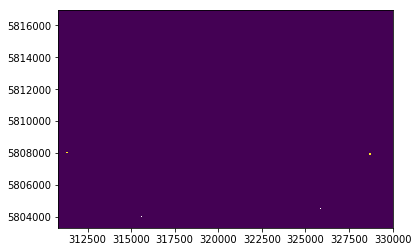

In [16]:
plt.pcolormesh(xv, yv, canvas)

In [17]:
export = pd.DataFrame(columns = ("lat", "lon", "value"))

c = 0

for j in range(0, len(xv[0])):
    
    for i in range(0, len(xv)):

        lat = xv[i,j]
        lon = yv[i,j]
        weight = canvas[i,j]
        
        export.loc[c] = [lat, lon, weight]
        
        c = c + 1

In [19]:
export.to_csv("melbourne.csv")

In [ ]:
ultimo = canvas

In [ ]:
xv[5,20]

In [ ]:
from scipy import interpolate
xx, yy = np.meshgrid(x, y)
z = np.sin(xx**2+yy**2)
f = interpolate.interp2d(x, y, z, kind='cubic')

In [ ]:
f

In [ ]:
grid_x, grid_y = np.mgrid[x_list, y_list]

In [ ]:
from scipy.interpolate import griddata

points = [(334076.04023795936, 6250582.245653596), (334076.04023795936, 6251282.245653596),
         (333576.04023795936, 6250482.245653596), (336076.04023795936, 6251282.245653596)]
values = [700, 200, 100, 50]
grid_z2 = griddata(points, values, (xv, yv), method='cubic')
plt.imshow(grid_z2.T, extent=(min(x_list),max(x_list),min(y_list),max(y_list)), origin='lower')

In [ ]:
x_list

In [ ]:
shape= [len(x), len(y)]
centre = [station[0][0],station[0][1]]
radius = 400
score = 10
bbox = mga_bbox

In [ ]:
print(station[0][0],station[0][1])

In [ ]:
plt.plot(station[0][0],station[0][1], "or")